In [0]:
# from comet_ml import Experiment
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy.random import seed
from tensorflow import set_random_seed
# import comet_ml in the top of your file


# set the random seeds to make sure your results are reproducible


seed(1)



set_random_seed(1)

cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(X_train.shape)

# Add the following code anywhere in your machine learning file



COMET INFO: Experiment is live on comet.ml https://www.comet.ml/harshverma59/ritikacvtest/418ee4052654443586082b1af9d48680



(50000, 32, 32, 3)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Preprocess Training Data:
Training:


Using TensorFlow backend.


Epoch 1/100
50000/50000 [==============================] - 10s 198us/sample - loss: 1.8940 - acc: 0.2961
Epoch 2/100
50000/50000 [==============================] - 7s 148us/sample - loss: 1.5041 - acc: 0.4573
Epoch 3/100
50000/50000 [==============================] - 7s 150us/sample - loss: 1.3526 - acc: 0.5167
Epoch 4/100
50000/50000 [==============================] - 7s 149us/sample - loss: 1.2532 - acc: 0.5534
Epoch 5/100
50000/50000 [==============================] - 7s 148us/sample - loss: 1.1840 - acc: 0.5818
Epoch 6/100
50000/50000 [==============================] - 7s 147us/sample - loss: 1.1139 - acc: 0.6063
Epoch 7/100
50000/50000 [==============================] - 7s 149us/sample - loss: 1.0655 - acc: 0.6256
Epoch 8/100
50000/50000 [==============================] - 7s 149us/sample - loss: 1.0244 - acc: 0.6399
Epoch 9/100
50000/50000 [==============================] - 7s 146us/sample - loss: 0.9878 - acc: 0.6520
Epoch 10/100
50000/50000 [==============================] - 7s 

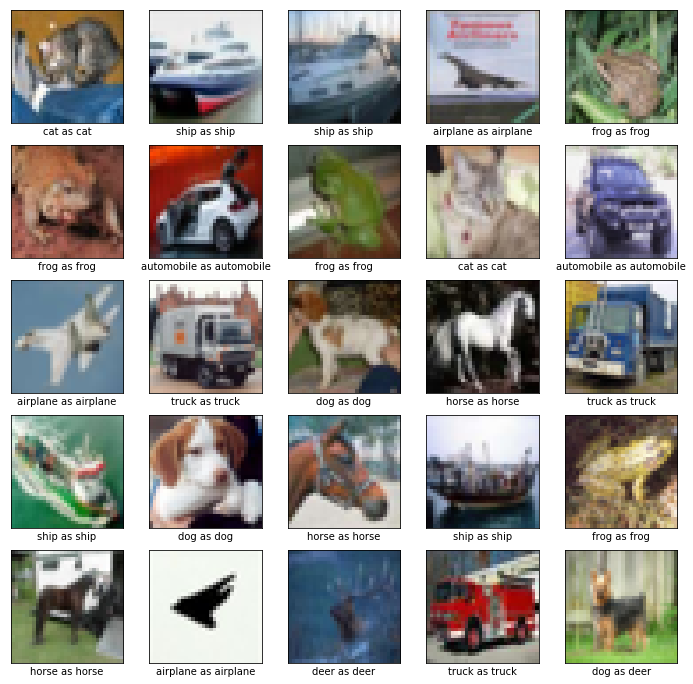

In [0]:
# Create model Model 1


model2 = keras.models.Sequential(
    [keras.layers.Conv2D(64, kernel_size = (3, 3), padding='same', activation=tf.nn.relu, input_shape=(32, 32, 3)),
     keras.layers.MaxPooling2D(2, 2),
     keras.layers.Dropout(0.25),
     keras.layers.Conv2D(128, kernel_size=(3, 3), activation=tf.nn.relu),
     keras.layers.Dropout(0.5),
     keras.layers.Conv2D(256, kernel_size=(3, 3), activation=tf.nn.relu),
     keras.layers.MaxPooling2D(2, 2),
     keras.layers.Dropout(0.5),
     keras.layers.Flatten(),
     keras.layers.Dense(128, activation=tf.nn.relu),
     keras.layers.Dropout(0.4),
     keras.layers.Dense(10, activation=tf.nn.softmax)])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print('Preprocess Training Data:')
X_train = X_train / 255.0

print('Training:')
with experiment.train():
  model2.fit(X_train, y_train, batch_size=256, epochs=100)


params={
    "batch_size":64,
    "epochs": 100,
    "num_classes":10}

experiment.log_parameters(params)

print('Preprocess Testing Data:')
X_test = X_test / 255.0
print('Testing:')

with experiment.test():
  test_loss, test_acc = model2.evaluate(X_test, y_test)
  print('Test accuracy:{}, Test Loss:{} '.format(test_acc, test_loss))

  metrics = {
      'loss':test_loss,
      'accuracy':test_acc
    }
  experiment.log_metrics(metrics)
  
print("Predicting the class for some sample test data:")
prob_result = model2.predict(X_test[0:25])
class_result = prob_result.argmax(axis=-1)
print(class_result.shape)
plt.figure("CFAR10 sample test results", figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    label = '{} as {}'.format(class_names[y_test[i, 0]], class_names[class_result[i]])
    plt.xlabel(label)
plt.show()